In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gan-getting-started/monet_jpg/ba52f976af.jpg
/kaggle/input/gan-getting-started/monet_jpg/24af733334.jpg
/kaggle/input/gan-getting-started/monet_jpg/73f33a12c5.jpg
/kaggle/input/gan-getting-started/monet_jpg/c14505c1da.jpg
/kaggle/input/gan-getting-started/monet_jpg/b44f24c048.jpg
/kaggle/input/gan-getting-started/monet_jpg/fb93438ff9.jpg
/kaggle/input/gan-getting-started/monet_jpg/f4413e97bd.jpg
/kaggle/input/gan-getting-started/monet_jpg/79224da51f.jpg
/kaggle/input/gan-getting-started/monet_jpg/82b9fd68b1.jpg
/kaggle/input/gan-getting-started/monet_jpg/369f6d07e8.jpg
/kaggle/input/gan-getting-started/monet_jpg/b5c2fe7c4c.jpg
/kaggle/input/gan-getting-started/monet_jpg/b1310da865.jpg
/kaggle/input/gan-getting-started/monet_jpg/baf6efabfe.jpg
/kaggle/input/gan-getting-started/monet_jpg/2cca56415e.jpg
/kaggle/input/gan-getting-started/monet_jpg/6bbe0e63c6.jpg
/kaggle/input/gan-getting-started/monet_jpg/158740962c.jpg
/kaggle/input/gan-getting-started/monet_jpg/4f045779b0.j

/kaggle/input/gan-getting-started/photo_jpg/ce107a12eb.jpg
/kaggle/input/gan-getting-started/photo_jpg/20d336b6c2.jpg
/kaggle/input/gan-getting-started/photo_jpg/0df9a45c26.jpg
/kaggle/input/gan-getting-started/photo_jpg/113444c0c2.jpg
/kaggle/input/gan-getting-started/photo_jpg/8e79534b0c.jpg
/kaggle/input/gan-getting-started/photo_jpg/52b870f300.jpg
/kaggle/input/gan-getting-started/photo_jpg/7e838e4c19.jpg
/kaggle/input/gan-getting-started/photo_jpg/c891a570bb.jpg
/kaggle/input/gan-getting-started/photo_jpg/688fd65571.jpg
/kaggle/input/gan-getting-started/photo_jpg/ec99be1db6.jpg
/kaggle/input/gan-getting-started/photo_jpg/7b8bc9e046.jpg
/kaggle/input/gan-getting-started/photo_jpg/019cf7682d.jpg
/kaggle/input/gan-getting-started/photo_jpg/dba404b1bd.jpg
/kaggle/input/gan-getting-started/photo_jpg/4ca6e5451a.jpg
/kaggle/input/gan-getting-started/photo_jpg/11f13ca69e.jpg
/kaggle/input/gan-getting-started/photo_jpg/c0a72ce31e.jpg
/kaggle/input/gan-getting-started/photo_jpg/34eac9ab64.j

/kaggle/input/gan-getting-started/photo_jpg/0ca5b3c96a.jpg
/kaggle/input/gan-getting-started/photo_jpg/51dc50880b.jpg
/kaggle/input/gan-getting-started/photo_jpg/17167ea036.jpg
/kaggle/input/gan-getting-started/photo_jpg/ffcc20463a.jpg
/kaggle/input/gan-getting-started/photo_jpg/92b15f83a3.jpg
/kaggle/input/gan-getting-started/photo_jpg/7056c4d0c9.jpg
/kaggle/input/gan-getting-started/photo_jpg/3648d77005.jpg
/kaggle/input/gan-getting-started/photo_jpg/2e1c6fc11b.jpg
/kaggle/input/gan-getting-started/photo_jpg/3d204371c7.jpg
/kaggle/input/gan-getting-started/photo_jpg/52f30bd94c.jpg
/kaggle/input/gan-getting-started/photo_jpg/86ecbea286.jpg
/kaggle/input/gan-getting-started/photo_jpg/114692dc5b.jpg
/kaggle/input/gan-getting-started/photo_jpg/0f1e6530bc.jpg
/kaggle/input/gan-getting-started/photo_jpg/3b465f08bf.jpg
/kaggle/input/gan-getting-started/photo_jpg/04838b8b1e.jpg
/kaggle/input/gan-getting-started/photo_jpg/b8009cb56d.jpg
/kaggle/input/gan-getting-started/photo_jpg/899f4a9c68.j

/kaggle/input/gan-getting-started/photo_jpg/f54cf76011.jpg
/kaggle/input/gan-getting-started/photo_jpg/2ddc57dd19.jpg
/kaggle/input/gan-getting-started/photo_jpg/0ae5e9bfe2.jpg
/kaggle/input/gan-getting-started/photo_jpg/2fb9a62d4f.jpg
/kaggle/input/gan-getting-started/photo_jpg/614e5368b3.jpg
/kaggle/input/gan-getting-started/photo_jpg/c525dc1668.jpg
/kaggle/input/gan-getting-started/photo_jpg/be66a96894.jpg
/kaggle/input/gan-getting-started/photo_jpg/9999c76d32.jpg
/kaggle/input/gan-getting-started/photo_jpg/852771e943.jpg
/kaggle/input/gan-getting-started/photo_jpg/20b3d168a6.jpg
/kaggle/input/gan-getting-started/photo_jpg/300bfa61ee.jpg
/kaggle/input/gan-getting-started/photo_jpg/92cb1b612c.jpg
/kaggle/input/gan-getting-started/photo_jpg/e2e85f68e0.jpg
/kaggle/input/gan-getting-started/photo_jpg/d09ad65e9a.jpg
/kaggle/input/gan-getting-started/photo_jpg/b8eb81d31d.jpg
/kaggle/input/gan-getting-started/photo_jpg/e41de69603.jpg
/kaggle/input/gan-getting-started/photo_jpg/e8a6213a64.j

In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

from kaggle_datasets import KaggleDatasets
import matplotlib.pyplot as plt
import numpy as np

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)

AUTOTUNE = tf.data.experimental.AUTOTUNE
    
print(tf.__version__)

Number of replicas: 1
2.3.1


In [39]:
GCS_PATH = KaggleDatasets().get_gcs_path()


In [40]:
MONET_FILENAMES = tf.io.gfile.glob(str(GCS_PATH + '/monet_tfrec/*.tfrec'))
print('Monet TFRecord Files:', len(MONET_FILENAMES))

PHOTO_FILENAMES = tf.io.gfile.glob(str(GCS_PATH + '/photo_tfrec/*.tfrec'))
print('Photo TFRecord Files:', len(PHOTO_FILENAMES))

Monet TFRecord Files: 5
Photo TFRecord Files: 20


In [41]:
IMAGE_SIZE = [256, 256]

def decode_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = (tf.cast(image, tf.float32) / 127.5) - 1
    image = tf.reshape(image, [*IMAGE_SIZE, 3])
    return image

def read_tfrecord(example):
    tfrecord_format = {
        "image_name": tf.io.FixedLenFeature([], tf.string),
        "image": tf.io.FixedLenFeature([], tf.string),
        "target": tf.io.FixedLenFeature([], tf.string)
    }
    example = tf.io.parse_single_example(example, tfrecord_format)
    image = decode_image(example['image'])
    return image

In [42]:
def load_dataset(filenames, labeled=True, ordered=False):
    dataset = tf.data.TFRecordDataset(filenames)
    dataset = dataset.map(read_tfrecord, num_parallel_calls=AUTOTUNE)
    return dataset

In [43]:
monet_ds = load_dataset(MONET_FILENAMES, labeled=True).batch(1)
photo_ds = load_dataset(PHOTO_FILENAMES, labeled=True).batch(1)


In [44]:
example_monet = next(iter(monet_ds))
example_photo = next(iter(photo_ds))

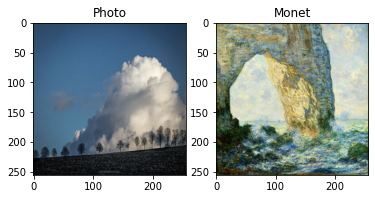

In [45]:
plt.subplot(121)
plt.title('Photo')
plt.imshow(example_photo[0] * 0.5 + 0.5)

plt.subplot(122)
plt.title('Monet')
plt.imshow(example_monet[0] * 0.5 + 0.5)

In [46]:
OUTPUT_CHANNELS = 3

def downsample(filters, size, apply_instancenorm=True):
    initializer = tf.random_normal_initializer(0., 0.02)
    gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)

    result = keras.Sequential()
    result.add(layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))

    if apply_instancenorm:
        result.add(tfa.layers.InstanceNormalization(gamma_initializer=gamma_init))

    result.add(layers.LeakyReLU())

    return result

In [47]:
def upsample(filters, size, apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)
    gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)

    result = keras.Sequential()
    result.add(layers.Conv2DTranspose(filters, size, strides=2,
                                      padding='same',
                                      kernel_initializer=initializer,
                                      use_bias=False))

    result.add(tfa.layers.InstanceNormalization(gamma_initializer=gamma_init))

    if apply_dropout:
        result.add(layers.Dropout(0.5))

    result.add(layers.ReLU())

    return result

In [48]:
def Generator():
    inputs = layers.Input(shape=[256,256,3])

    # bs = batch size
    down_stack = [
        downsample(64, 4, apply_instancenorm=False), # (bs, 128, 128, 64)
        downsample(128, 4), # (bs, 64, 64, 128)
        downsample(256, 4), # (bs, 32, 32, 256)
        downsample(512, 4), # (bs, 16, 16, 512)
        downsample(512, 4), # (bs, 8, 8, 512)
        downsample(512, 4), # (bs, 4, 4, 512)
        downsample(512, 4), # (bs, 2, 2, 512)
        downsample(512, 4), # (bs, 1, 1, 512)
    ]

    up_stack = [
        upsample(512, 4, apply_dropout=True), # (bs, 2, 2, 1024)
        upsample(512, 4, apply_dropout=True), # (bs, 4, 4, 1024)
        upsample(512, 4, apply_dropout=True), # (bs, 8, 8, 1024)
        upsample(512, 4), # (bs, 16, 16, 1024)
        upsample(256, 4), # (bs, 32, 32, 512)
        upsample(128, 4), # (bs, 64, 64, 256)
        upsample(64, 4), # (bs, 128, 128, 128)
    ]

    initializer = tf.random_normal_initializer(0., 0.02)
    last = layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                  strides=2,
                                  padding='same',
                                  kernel_initializer=initializer,
                                  activation='tanh') # (bs, 256, 256, 3)

    x = inputs

    # Downsampling through the model
    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)

    skips = reversed(skips[:-1])

    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = layers.Concatenate()([x, skip])

    x = last(x)

    return keras.Model(inputs=inputs, outputs=x)

In [49]:
def Discriminator():
    initializer = tf.random_normal_initializer(0., 0.02)
    gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)

    inp = layers.Input(shape=[256, 256, 3], name='input_image')

    x = inp

    down1 = downsample(64, 4, False)(x) # (bs, 128, 128, 64)
    down2 = downsample(128, 4)(down1) # (bs, 64, 64, 128)
    down3 = downsample(256, 4)(down2) # (bs, 32, 32, 256)

    zero_pad1 = layers.ZeroPadding2D()(down3) # (bs, 34, 34, 256)
    conv = layers.Conv2D(512, 4, strides=1,
                         kernel_initializer=initializer,
                         use_bias=False)(zero_pad1) # (bs, 31, 31, 512)

    norm1 = tfa.layers.InstanceNormalization(gamma_initializer=gamma_init)(conv)

    leaky_relu = layers.LeakyReLU()(norm1)

    zero_pad2 = layers.ZeroPadding2D()(leaky_relu) # (bs, 33, 33, 512)

    last = layers.Conv2D(1, 4, strides=1,
                         kernel_initializer=initializer)(zero_pad2) # (bs, 30, 30, 1)

    return tf.keras.Model(inputs=inp, outputs=last)

In [50]:
with strategy.scope():
    monet_generator = Generator() # transforms photos to Monet-esque paintings
    photo_generator = Generator() # transforms Monet paintings to be more like photos

    monet_discriminator = Discriminator() # differentiates real Monet paintings and generated Monet paintings
    photo_discriminator = Discriminator() # differentiates real photos and generated photos

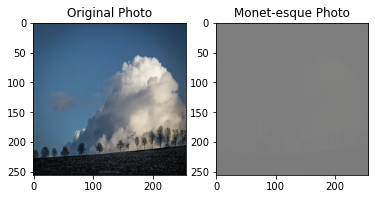

In [51]:
to_monet = monet_generator(example_photo)

plt.subplot(1, 2, 1)
plt.title("Original Photo")
plt.imshow(example_photo[0] * 0.5 + 0.5)

plt.subplot(1, 2, 2)
plt.title("Monet-esque Photo")
plt.imshow(to_monet[0] * 0.5 + 0.5)
plt.show()

In [52]:
class CycleGan(keras.Model):
    def __init__(
        self,
        monet_generator,
        photo_generator,
        monet_discriminator,
        photo_discriminator,
        lambda_cycle=10,
    ):
        super(CycleGan, self).__init__()
        self.m_gen = monet_generator
        self.p_gen = photo_generator
        self.m_disc = monet_discriminator
        self.p_disc = photo_discriminator
        self.lambda_cycle = lambda_cycle
        
    def compile(
        self,
        m_gen_optimizer,
        p_gen_optimizer,
        m_disc_optimizer,
        p_disc_optimizer,
        gen_loss_fn,
        disc_loss_fn,
        cycle_loss_fn,
        identity_loss_fn
    ):
        super(CycleGan, self).compile()
        self.m_gen_optimizer = m_gen_optimizer
        self.p_gen_optimizer = p_gen_optimizer
        self.m_disc_optimizer = m_disc_optimizer
        self.p_disc_optimizer = p_disc_optimizer
        self.gen_loss_fn = gen_loss_fn
        self.disc_loss_fn = disc_loss_fn
        self.cycle_loss_fn = cycle_loss_fn
        self.identity_loss_fn = identity_loss_fn
        
    def train_step(self, batch_data):
        real_monet, real_photo = batch_data
        
        with tf.GradientTape(persistent=True) as tape:
            # photo to monet back to photo
            fake_monet = self.m_gen(real_photo, training=True)
            cycled_photo = self.p_gen(fake_monet, training=True)

            # monet to photo back to monet
            fake_photo = self.p_gen(real_monet, training=True)
            cycled_monet = self.m_gen(fake_photo, training=True)

            # generating itself
            same_monet = self.m_gen(real_monet, training=True)
            same_photo = self.p_gen(real_photo, training=True)

            # discriminator used to check, inputing real images
            disc_real_monet = self.m_disc(real_monet, training=True)
            disc_real_photo = self.p_disc(real_photo, training=True)

            # discriminator used to check, inputing fake images
            disc_fake_monet = self.m_disc(fake_monet, training=True)
            disc_fake_photo = self.p_disc(fake_photo, training=True)

            # evaluates generator loss
            monet_gen_loss = self.gen_loss_fn(disc_fake_monet)
            photo_gen_loss = self.gen_loss_fn(disc_fake_photo)

            # evaluates total cycle consistency loss
            total_cycle_loss = self.cycle_loss_fn(real_monet, cycled_monet, self.lambda_cycle) + self.cycle_loss_fn(real_photo, cycled_photo, self.lambda_cycle)

            # evaluates total generator loss
            total_monet_gen_loss = monet_gen_loss + total_cycle_loss + self.identity_loss_fn(real_monet, same_monet, self.lambda_cycle)
            total_photo_gen_loss = photo_gen_loss + total_cycle_loss + self.identity_loss_fn(real_photo, same_photo, self.lambda_cycle)

            # evaluates discriminator loss
            monet_disc_loss = self.disc_loss_fn(disc_real_monet, disc_fake_monet)
            photo_disc_loss = self.disc_loss_fn(disc_real_photo, disc_fake_photo)

        # Calculate the gradients for generator and discriminator
        monet_generator_gradients = tape.gradient(total_monet_gen_loss,
                                                  self.m_gen.trainable_variables)
        photo_generator_gradients = tape.gradient(total_photo_gen_loss,
                                                  self.p_gen.trainable_variables)

        monet_discriminator_gradients = tape.gradient(monet_disc_loss,
                                                      self.m_disc.trainable_variables)
        photo_discriminator_gradients = tape.gradient(photo_disc_loss,
                                                      self.p_disc.trainable_variables)

        # Apply the gradients to the optimizer
        self.m_gen_optimizer.apply_gradients(zip(monet_generator_gradients,
                                                 self.m_gen.trainable_variables))

        self.p_gen_optimizer.apply_gradients(zip(photo_generator_gradients,
                                                 self.p_gen.trainable_variables))

        self.m_disc_optimizer.apply_gradients(zip(monet_discriminator_gradients,
                                                  self.m_disc.trainable_variables))

        self.p_disc_optimizer.apply_gradients(zip(photo_discriminator_gradients,
                                                  self.p_disc.trainable_variables))
        
        return {
            "monet_gen_loss": total_monet_gen_loss,
            "photo_gen_loss": total_photo_gen_loss,
            "monet_disc_loss": monet_disc_loss,
            "photo_disc_loss": photo_disc_loss
        }

In [53]:
with strategy.scope():
    def discriminator_loss(real, generated):
        real_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)(tf.ones_like(real), real)

        generated_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)(tf.zeros_like(generated), generated)

        total_disc_loss = real_loss + generated_loss

        return total_disc_loss * 0.5

In [54]:
with strategy.scope():
    def generator_loss(generated):
        return tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)(tf.ones_like(generated), generated)

In [55]:
with strategy.scope():
    def calc_cycle_loss(real_image, cycled_image, LAMBDA):
        loss1 = tf.reduce_mean(tf.abs(real_image - cycled_image))

        return LAMBDA * loss1

In [56]:
with strategy.scope():
    def identity_loss(real_image, same_image, LAMBDA):
        loss = tf.reduce_mean(tf.abs(real_image - same_image))
        return LAMBDA * 0.5 * loss

In [57]:
with strategy.scope():
    monet_generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
    photo_generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

    monet_discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
    photo_discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [58]:
with strategy.scope():
    cycle_gan_model = CycleGan(
        monet_generator, photo_generator, monet_discriminator, photo_discriminator
    )

    cycle_gan_model.compile(
        m_gen_optimizer = monet_generator_optimizer,
        p_gen_optimizer = photo_generator_optimizer,
        m_disc_optimizer = monet_discriminator_optimizer,
        p_disc_optimizer = photo_discriminator_optimizer,
        gen_loss_fn = generator_loss,
        disc_loss_fn = discriminator_loss,
        cycle_loss_fn = calc_cycle_loss,
        identity_loss_fn = identity_loss
    )

In [59]:
# #Check that model loading works
# monet_generator = Generator()
# to_monet = monet_generator(example_photo)

# plt.subplot(1, 2, 1)
# plt.title("Original Photo")
# plt.imshow(example_photo[0] * 0.5 + 0.5)

# plt.subplot(1, 2, 2)
# plt.title("Monet-esque Photo")
# plt.imshow(to_monet[0] * 0.5 + 0.5)
# plt.show()

# #Now load weights
# cycle_gan_model.load_weights(checkpoint_path)
# to_monet = monet_generator(example_photo)

# plt.subplot(1, 2, 1)
# plt.title("Original Photo")
# plt.imshow(example_photo[0] * 0.5 + 0.5)

# plt.subplot(1, 2, 2)
# plt.title("Monet-esque Photo")
# plt.imshow(to_monet[0] * 0.5 + 0.5)
# plt.show()


In [60]:
#Create a model callback that saves the weights
checkpoint_path = "training_1/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


In [62]:
cycle_gan_model.fit(
    tf.data.Dataset.zip((monet_ds, photo_ds)),
    epochs=25,
    callbacks=[cp_callback]
)

Epoch 1/25
    300/Unknown - 78s 259ms/step - monet_gen_loss: 2.7917 - photo_gen_loss: 2.8482 - monet_disc_loss: 0.6291 - photo_disc_loss: 0.6172
Epoch 00001: saving model to training_1/cp.ckpt
300/300 [==============================] - 81s 271ms/step - monet_gen_loss: 2.7918 - photo_gen_loss: 2.8485 - monet_disc_loss: 0.6289 - photo_disc_loss: 0.6169
Epoch 2/25
300/300 [==============================] - ETA: 0s - monet_gen_loss: 2.7627 - photo_gen_loss: 2.8156 - monet_disc_loss: 0.6292 - photo_disc_loss: 0.6191
Epoch 00002: saving model to training_1/cp.ckpt
300/300 [==============================] - 81s 270ms/step - monet_gen_loss: 2.7621 - photo_gen_loss: 2.8147 - monet_disc_loss: 0.6290 - photo_disc_loss: 0.6189
Epoch 3/25
300/300 [==============================] - ETA: 0s - monet_gen_loss: 2.7341 - photo_gen_loss: 2.7871 - monet_disc_loss: 0.6331 - photo_disc_loss: 0.6247
Epoch 00003: saving model to training_1/cp.ckpt
300/300 [==============================] - 81s 272ms/step - mo

300/300 [==============================] - ETA: 0s - monet_gen_loss: 2.7834 - photo_gen_loss: 2.9934 - monet_disc_loss: 0.5898 - photo_disc_loss: 0.5348
Epoch 00023: saving model to training_1/cp.ckpt
300/300 [==============================] - 82s 272ms/step - monet_gen_loss: 2.7843 - photo_gen_loss: 2.9922 - monet_disc_loss: 0.5892 - photo_disc_loss: 0.5349
Epoch 24/25
300/300 [==============================] - ETA: 0s - monet_gen_loss: 2.6974 - photo_gen_loss: 2.8812 - monet_disc_loss: 0.6071 - photo_disc_loss: 0.5631
Epoch 00024: saving model to training_1/cp.ckpt
300/300 [==============================] - 81s 270ms/step - monet_gen_loss: 2.6982 - photo_gen_loss: 2.8810 - monet_disc_loss: 0.6062 - photo_disc_loss: 0.5629
Epoch 25/25
300/300 [==============================] - ETA: 0s - monet_gen_loss: 2.6700 - photo_gen_loss: 2.8419 - monet_disc_loss: 0.6020 - photo_disc_loss: 0.5694
Epoch 00025: saving model to training_1/cp.ckpt
300/300 [==============================] - 81s 271ms/

In [63]:
print(monet_generator.summary())

Model: "functional_25"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
sequential_108 (Sequential)     (None, 128, 128, 64) 3072        input_7[0][0]                    
__________________________________________________________________________________________________
sequential_109 (Sequential)     (None, 64, 64, 128)  131328      sequential_108[0][0]             
__________________________________________________________________________________________________
sequential_110 (Sequential)     (None, 32, 32, 256)  524800      sequential_109[0][0]             
______________________________________________________________________________________

In [64]:
cycle_gan_model.save_weights('./checkpoints/my_checkpoint')


In [65]:
#Check the checkpoint files
checkpoint_dir = os.path.dirname(checkpoint_path)
!ls {checkpoint_dir}

checkpoint  cp.ckpt.data-00000-of-00001  cp.ckpt.index


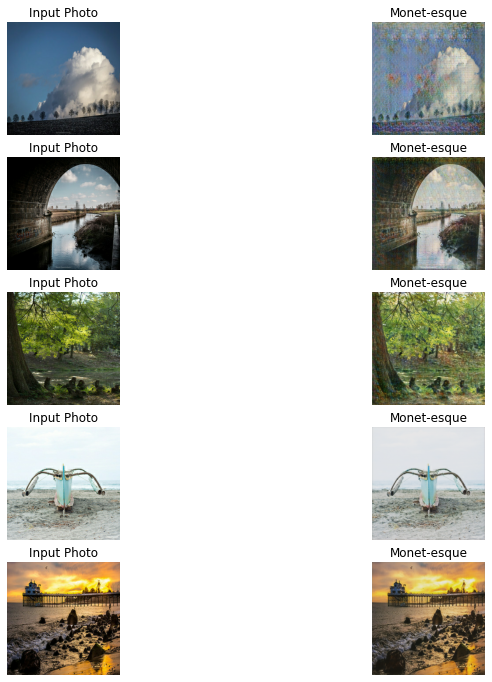

In [66]:
_, ax = plt.subplots(5, 2, figsize=(12, 12))
for i, img in enumerate(photo_ds.take(5)):
    prediction = monet_generator(img, training=False)[0].numpy()
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)

    ax[i, 0].imshow(img)
    ax[i, 1].imshow(prediction)
    ax[i, 0].set_title("Input Photo")
    ax[i, 1].set_title("Monet-esque")
    ax[i, 0].axis("off")
    ax[i, 1].axis("off")
plt.show()



In [67]:
#Check that model loading works
monet_generator_loaded = Generator() # transforms photos to Monet-esque paintings
photo_generator_loaded = Generator() # transforms Monet paintings to be more like photos

monet_discriminator_loaded = Discriminator() # differentiates real Monet paintings and generated Monet paintings
photo_discriminator_loaded = Discriminator() # differentiates real photos and generated photos
    
cycle_gan_model_loaded = CycleGan(
    monet_generator_loaded, photo_generator_loaded, monet_discriminator_loaded, photo_discriminator_loaded
)

cycle_gan_model_loaded.compile(
    m_gen_optimizer = monet_generator_optimizer,
    p_gen_optimizer = photo_generator_optimizer,
    m_disc_optimizer = monet_discriminator_optimizer,
    p_disc_optimizer = photo_discriminator_optimizer,
    gen_loss_fn = generator_loss,
    disc_loss_fn = discriminator_loss,
    cycle_loss_fn = calc_cycle_loss,
    identity_loss_fn = identity_loss
)

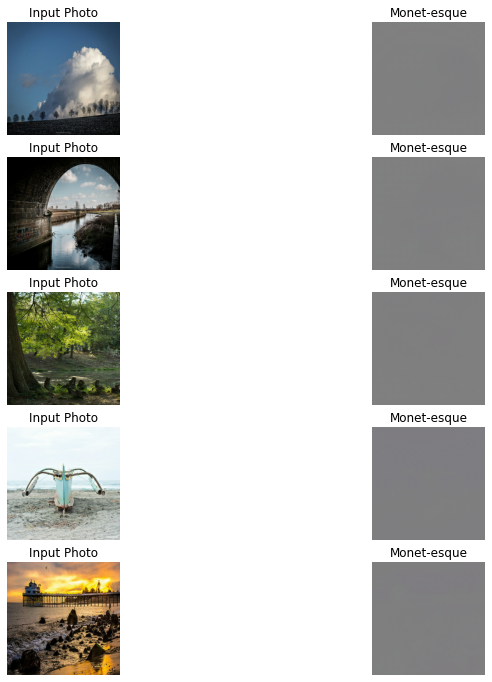

In [68]:
_, ax = plt.subplots(5, 2, figsize=(12, 12))
for i, img in enumerate(photo_ds.take(5)):
    prediction = monet_generator_loaded(img, training=False)[0].numpy()
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)

    ax[i, 0].imshow(img)
    ax[i, 1].imshow(prediction)
    ax[i, 0].set_title("Input Photo")
    ax[i, 1].set_title("Monet-esque")
    ax[i, 0].axis("off")
    ax[i, 1].axis("off")
plt.show()

In [69]:
cycle_gan_model_loaded.load_weights(checkpoint_path)

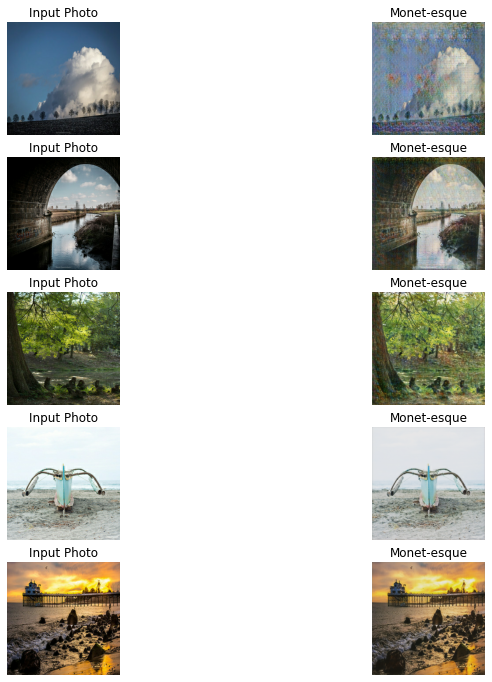

In [70]:
_, ax = plt.subplots(5, 2, figsize=(12, 12))
for i, img in enumerate(photo_ds.take(5)):
    prediction = monet_generator_loaded(img, training=False)[0].numpy()
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)

    ax[i, 0].imshow(img)
    ax[i, 1].imshow(prediction)
    ax[i, 0].set_title("Input Photo")
    ax[i, 1].set_title("Monet-esque")
    ax[i, 0].axis("off")
    ax[i, 1].axis("off")
plt.show()